This is a workbook that I've used for testing and visualizing various methods which are described in my final report. The main code can be found in airplane_system.py, rrt.py, and proj_helpers.py.

In [85]:
%reload_ext autoreload
%autoreload 2
from airplane_system import AirplaneSystem
import numpy as np
from proj_helpers import *
from rrt import *
import time
from IPython.display import HTML

In [63]:
# 6D state (x, z, V, gamma, theta, q)
x0 = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane = AirplaneSystem()
input_trajectory, state_trajectory_approx, time_array = airplane.trajOpt(x0, dircol=0, second_pass=False)

Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 12.8 seconds **

t_f computed: 16.667 seconds
cost computed: 3108.372


trajectory-following simulations finished


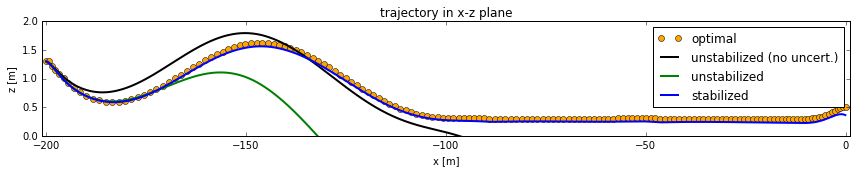

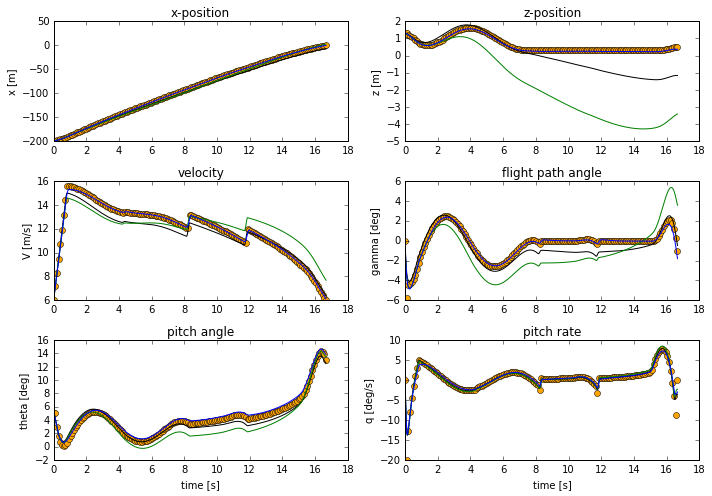

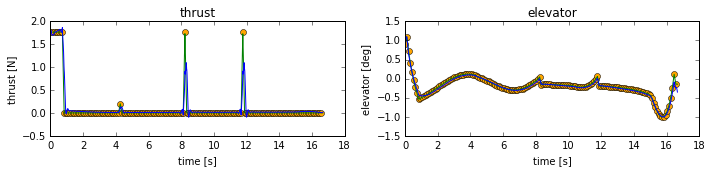

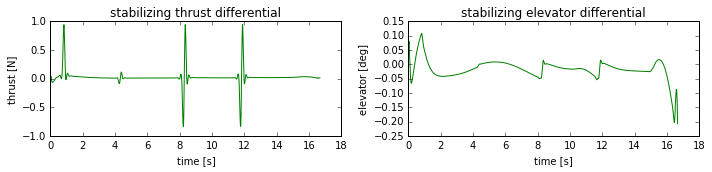

In [71]:
trajplot = simAndCompare(airplane, x0, compare=True)

In [120]:
knots_full = range(0,len(airplane.ttraj)-1,5)
knots_full = knots_full[::-1] # go backwards from goal
t0 = time.time()
rho_full = getRho(airplane, knots_full, False)
t1 = time.time()
print('sweep finished in %.2f seconds' % (t1-t0))

i:  0 , knot:  155 , rho:  0.0360406494141
i:  1 , knot:  150 , rho:  0.03796875
i:  2 , knot:  145 , rho:  0.0480541992188
i:  3 , knot:  140 , rho:  0.0405457305908
i:  4 , knot:  135 , rho:  0.0360406494141
i:  5 , knot:  130 , rho:  0.0360406494141
i:  6 , knot:  125 , rho:  0.0360406494141
i:  7 , knot:  120 , rho:  0.0360406494141
i:  8 , knot:  115 , rho:  0.0360406494141
i:  9 , knot:  110 , rho:  0.03796875
i:  10 , knot:  105 , rho:  0.0304092979431
i:  11 , knot:  100 , rho:  0.0360406494141
i:  12 , knot:  95 , rho:  0.0304092979431
i:  13 , knot:  90 , rho:  0.03796875
i:  14 , knot:  85 , rho:  0.0304092979431
i:  15 , knot:  80 , rho:  0.04271484375
i:  16 , knot:  75 , rho:  0.03375
i:  17 , knot:  70 , rho:  0.03796875
i:  18 , knot:  65 , rho:  0.0284765625
i:  19 , knot:  60 , rho:  0.03375
i:  20 , knot:  55 , rho:  0.03796875
i:  21 , knot:  50 , rho:  0.0320361328125
i:  22 , knot:  45 , rho:  0.0405457305908
i:  23 , knot:  40 , rho:  0.03796875
i:  24 , knot:  3

<IPython.core.display.Javascript object>


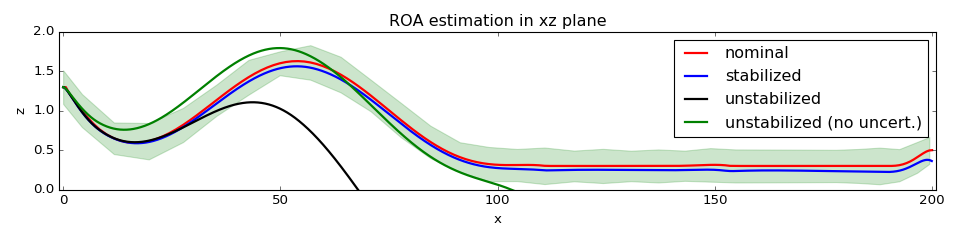

In [186]:
funnelplot = plotTrajFunnel(airplane, rho_full, knots_full)
funnelplot.legend(('nominal', 'stabilized', 'unstabilized', 'unstabilized (no uncert.)'))
# funnelplot.savefig('figs/funnel_traj2.png', dpi=300)
funnelplot.show()

In [ ]:
horizontal_starts = np.arange(0,151,5)
x0 = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
x0_sweep = np.zeros((horizontal_starts.shape[0], x0.shape[0]))
sys_sweep = []

for i, start in enumerate(horizontal_starts):
    x0_sweep[i,:] = x0
    x0_sweep[i,0] = start
    if np.mod(i, 2) == 0:
        x0_sweep[i,1] = x0[1] - 0.5

    sys = AirplaneSystem()
    utraj, xtraj, ttraj = sys.trajOpt(x0_sweep[i,:], dircol=0, second_pass=False)
    sys_sweep.append(sys)
    print 'i: ', i, ', tf: ', ttraj[-1]


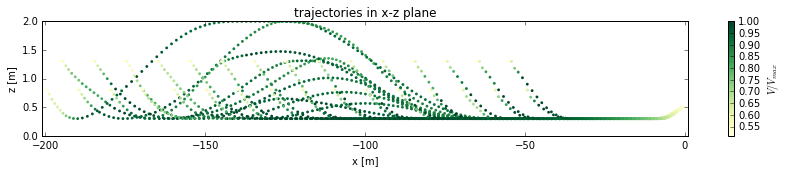

In [62]:
# plotMultipleTraj(sys_sweep, savefile='figs/traj_sweep_may16.png')

<IPython.core.display.Javascript object>


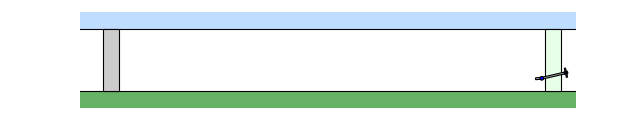

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


In [107]:
viz = urdfViz(airplane)
# viz.save('figs/urdfViz3.mp4', dpi=350)
# plt.close()
# HTML(viz.to_html5_video())

<IPython.core.display.Javascript object>


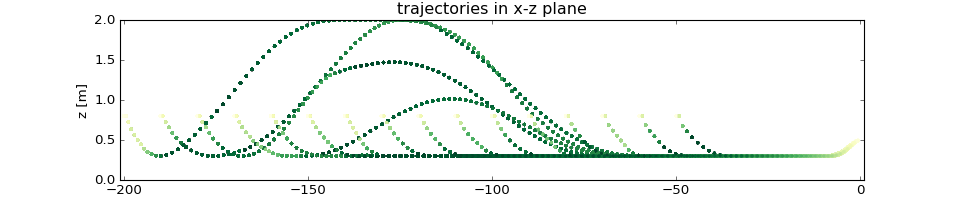

In [102]:
%matplotlib nbagg
animateMultipleTraj(sys_sweep[0::2], saveprefix='figs/even_step')

In [ ]:
# do a simple RRT with obstacles
obs = np.array([[-100, -1.0, 10, 2.0], [-30, -1.0, 10, 2.0], [-160, 1.0, 10, 2.0], [-60, 1.0, 10, 0.5]])
x0_rrt = np.array([-200.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
xg_rrt = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane_rrt = AirplaneSystem()
rrt = RRTStar(x0_rrt, xg_rrt, airplane_rrt, obs)
goal_node = rrt.run()

<IPython.core.display.Javascript object>


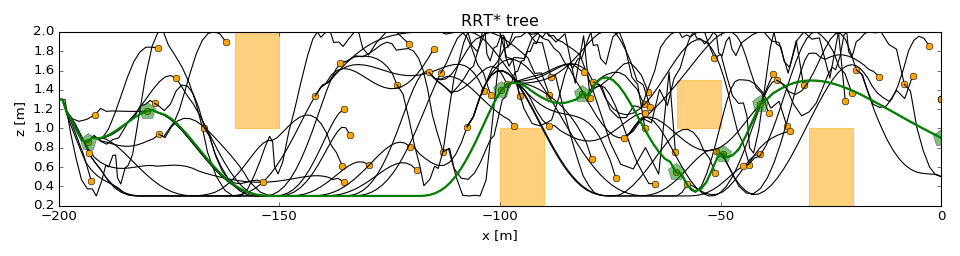

total cost of RRT* path:  370.360218021


In [139]:
treeplot_rrt = rrtPlot(rrt, 'rrtstar_tree.png')

computing TVLQR along trajectory
trajectory-following simulations finished


<IPython.core.display.Javascript object>


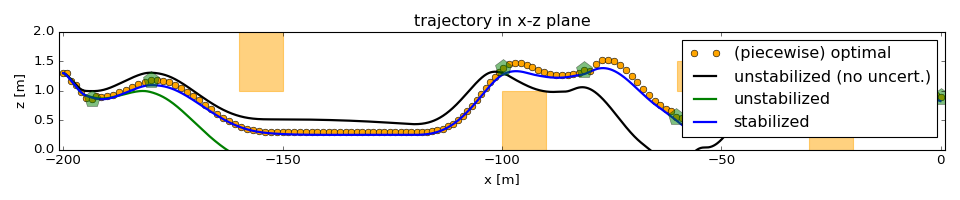

<IPython.core.display.Javascript object>


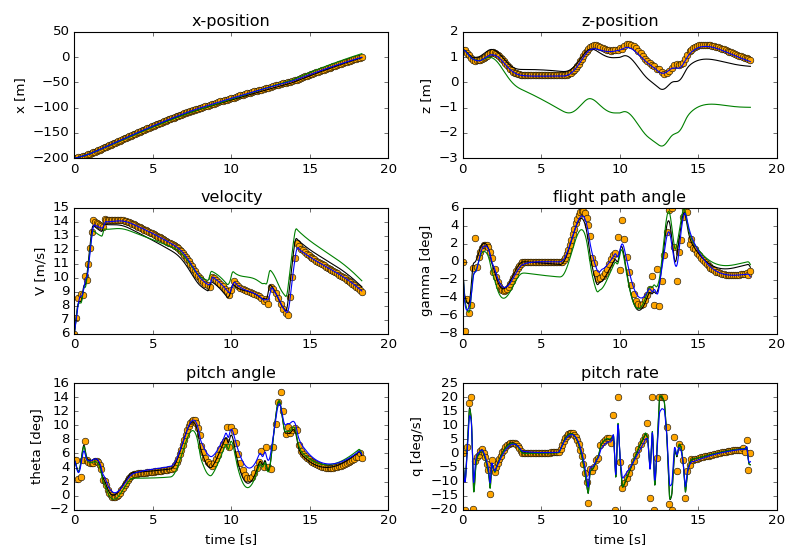

<IPython.core.display.Javascript object>


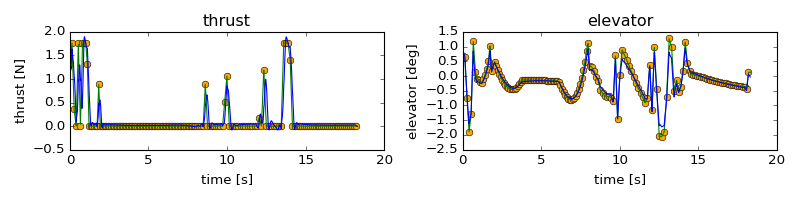

In [141]:
trajplot_rrt = simAndCompare(rrt.plant, x0_rrt, obs=obs, goalnode=rrt.best_goal_node, compare=True)

<IPython.core.display.Javascript object>


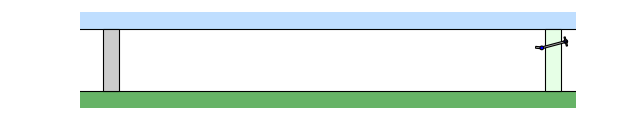

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


In [106]:
viz = urdfViz(rrt.plant)
# plt.close()
# HTML(viz.to_html5_video())

In [5]:
t = 140 # index of simulation run
rho_test = getRho(airplane, t, False)

rho:  53.5232468359
rho:  40.1424351269
rho:  30.1068263452
rho:  22.5801197589
rho:  16.9350898192
rho:  12.7013173644
rho:  9.52598802328
rho:  7.14449101746
rho:  5.3583682631
rho:  4.01877619732
rho:  3.01408214799
rho:  2.26056161099
rho:  1.69542120825
rho:  1.27156590618
rho:  0.953674429638
i:  0 , knot:  140 , rho:  53.5232468359
